I put the data in the shared project folder. But Colab uses essentially global paths. To get around this:

Make a shortcut (right click and select make shortcut) and just put it on your drive (not inside any folder). 
That way the notebook can use the same global path for all of us. Essentially:

drive/adult19.csv

In [ ]:
#mount drive - so it can pull data from there
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#other imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [ ]:
#absolute path
path = '/content/drive/MyDrive/adult19.csv'
interviewData = pd.read_csv (path)

In [ ]:
#look at data
interviewData

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,...,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_QRT,RECTYPE,WTFA_A,WTIA_A,HHX,POVRATTC_A
0,4,9,3,0,60000,2,2,122,3,2,...,NaN,NaN,1,1,1,10,13177.008,7601.336,H048109,2.96
1,4,9,3,0,50000,0,2,122,2,1,...,NaN,NaN,1,1,1,10,6140.552,3344.434,H027044,2.97
2,4,12,3,0,65000,1,2,122,2,1,...,NaN,NaN,1,1,1,10,9191.061,6949.498,H058855,4.28
3,4,14,5,0,120000,0,2,122,1,8,...,NaN,NaN,1,1,1,10,7900.035,6446.327,H031993,7.13
4,1,4,1,0,30000,0,2,115,2,1,...,NaN,NaN,1,1,1,10,10875.772,8646.586,H007122,1.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31992,4,14,5,0,116204,0,100,114,2,1,...,NaN,NaN,1,1,4,10,2679.016,1965.416,H046022,7.65
31993,4,8,3,0,68000,0,100,114,2,1,...,NaN,NaN,1,1,4,10,6726.495,3920.208,H046232,2.02
31994,4,13,3,0,60000,0,100,114,2,1,...,NaN,NaN,1,1,4,10,1246.306,864.743,H043765,4.98
31995,4,14,5,0,101000,0,100,114,1,1,...,NaN,NaN,1,1,4,10,3427.198,2595.209,H017695,6.00


In [ ]:
#look at datatypes
interviewData.dtypes

URBRRL          int64
RATCAT_A        int64
INCGRP_A        int64
INCTCFLG_A      int64
FAMINCTC_A      int64
               ...   
RECTYPE         int64
WTFA_A        float64
WTIA_A        float64
HHX            object
POVRATTC_A    float64
Length: 534, dtype: object

In [ ]:
#let's which are not numbers
interviewData.select_dtypes(exclude=['int64', 'float64'])
#HHX column is string code
#everything else is a number/float

,HHX
0,H048109
1,H027044
2,H058855
3,H031993
4,H007122
...,...
31992,H046022
31993,H046232
31994,H043765
31995,H017695


In [ ]:
#look at all columns (variables/features)
for c in interviewData.columns:
    print (c)

URBRRL
RATCAT_A
INCGRP_A
INCTCFLG_A
FAMINCTC_A
IMPINCFLG_A
PPSU
PSTRAT
HISPALLP_A
RACEALLP_A
DISAB3_A
SCHDYMSSTC_A
AFNOW
PHQCAT_A
YRSINUS_A
CITZNSTP_A
LEGMSTAT_A
MARSTAT_A
SASPPRACE_A
SASPPHISP_A
PRTNREDUC_A
SPOUSEDUC_A
PRTNRAGETC_A
SPOUSAGETC_A
PRTNRWKFT_A
PRTNRWRK_A
SPOUSWKFT_A
SPOUSWRK_A
SPOUSESEX_A
PRTNRSEX_A
SHTHPVAGEP_A
SHINGRXYRP_A
ZOSTAVXYRP_A
HHRESPSA_FLG
GADCAT_A
PCNTADTWFP_A
PCNTADTWKP_A
FDSCAT4_A
FDSCAT3_A
EMPDYSMSS2_A
EMPLSTWORK_A
EMPWRKFT_A
EMPWRKLSWK_A
EMPWKHRS2_A
DIFYRSTC_A
DIBAGETC_A
SMKECIGST_A
SMKCIGST_A
BMICAT_A
WEIGHTLBTC_A
HEIGHTTC_A
URGNT12MTC_A
EMERG12MTC_A
PSA5YRTC_A
PCNTTC
PCNT18UPTC
PCNTLT18TC
COVER65_A
COVER_A
EXCHANGE_A
NOTCOV_A
MILSPC1R_A
OGFLG_A
OPFLG_A
CHFLG_A
MAFLG_A
PLNWRKR2_A
PLNWRKR1_A
RSNHIMISS_A
RSNHIJOB_A
MCADVR_A
PRFLG_A
PLEXCHPR1_A
PRPREM1_A
PXCHNG1_A
HICOSTR2_A
HICOSTR1_A
OTHGOV_A
OTHPUB_A
IHS_A
MILITARY_A
CHIP_A
MEDICAID_A
MEDICARE_A
PRIVATE_A
PRPLCOV1_C_A
PRPLCOV2_C_A
PLEXCHOG_A
PLEXCHOP_A
EXCHPR2_A
EXCHPR1_A
EDUC_A
MAXEDUC_A
PARSTAT_A
SAPARE

In [ ]:
#check for NANs per column
#total columns
tot_col = len(interviewData.columns)
#columns with missing data
missingData_cols=interviewData.columns[interviewData.isnull().any(axis=0)]

print('total columns:', tot_col)
print('total columns w/ missing data: ', len(missingData_cols))
print('% columns w/ missing data: ', len(missingData_cols)/tot_col*100)


total columns: 534
total columns w/ missing data:  366
% columns w/ missing data:  68.53932584269663


In [ ]:
#check for NANs per column
#total rows
tot_rows = len(interviewData.index)
#columns with missing data
missingData_rows=interviewData.index[interviewData.isnull().any(axis=1)]
print('total rows:', tot_rows)
print('total rows w/ missing data: ', len(missingData_rows))
print('% rows w/ missing data: ', len(missingData_rows)/tot_rows*100)

total rows: 31997
total rows w/ missing data:  31997
% rows w/ missing data:  100.0


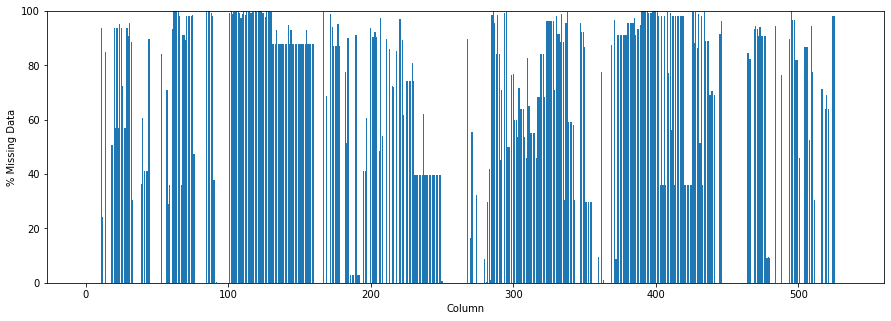

In [ ]:
#graph nans per column, normalized
tot = len(interviewData.index)
missingDataCounts_cols = interviewData.isnull().sum(axis=0)/tot*100

fig = plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(missingDataCounts_cols)), missingDataCounts_cols)

plt.ylim(top=100)
plt.xlabel('Column')
plt.ylabel('% Missing Data')

plt.show()

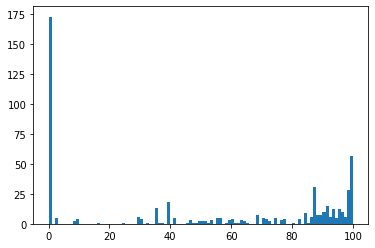

In [ ]:
#histogram of missing data
plt.hist(missingDataCounts_cols, bins=100)
plt.show()

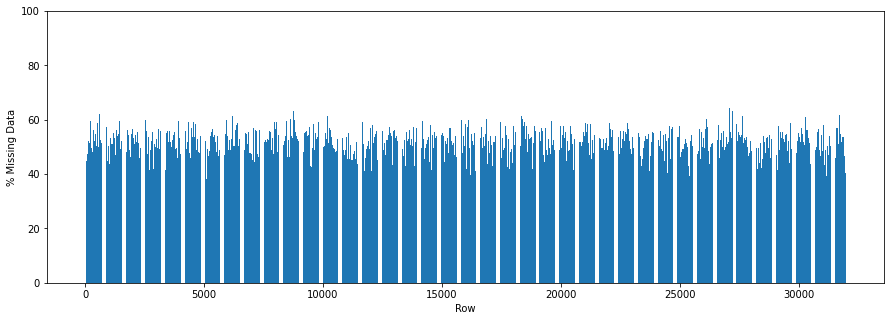

In [ ]:
#graph nans per row, normalized
tot = len(interviewData.columns)
missingDataCounts_rows = interviewData.isnull().sum(axis=1)/tot*100

fig = plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(missingDataCounts_rows)), missingDataCounts_rows)

plt.ylim(top=100)
plt.xlabel('Row')
plt.ylabel('% Missing Data')

plt.show()

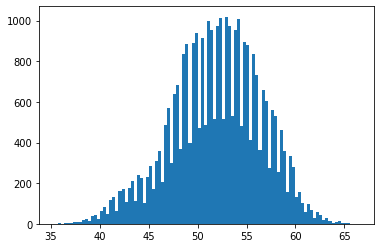

In [ ]:
#histogram of missing data
plt.hist(missingDataCounts_rows, bins=100)
plt.show()

#Target column analysis


1    25355
2     3702
3     1319
4      877
8      744
Name: PHQCAT_A, dtype: int64

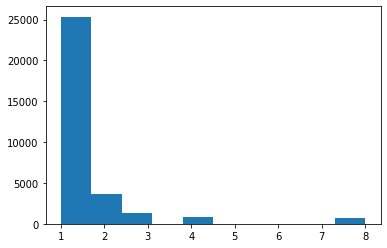

In [ ]:
target = interviewData.loc[:,'PHQCAT_A']
plt.hist(target)
target.value_counts()

# Isabelle
Columns 1-162

I decided to split up this part of the dataset into the sections as defined in the codebook. The variable names are all according to the codebook section names. These sections aren't all-inclusive, so if there's part that somebody else could add from their section, feel free.

I specifically added the anxiety section as its own variable because I suspect that those columns will be relevant to our model. 

In [ ]:
col_A = interviewData.loc[:,'URBRRL':'BLADDCAN_A']

#sections
target = interviewData.loc[:,'PHQCAT_A'] #this is the categorization of PHQ depressive symptoms

family_composition = interviewData.loc[:,'EDUC_A':'PCNTKIDS_A'] #Family Composition section, includes some questions from other sections
income = interviewData.loc[:,'RATCAT_A':'IMPINCFLG_A'] #Various income questions from different sections
household_composition = pd.concat((interviewData.loc[:, 'HISPALLP_A':'AFNOW'], interviewData.loc[:, 'PCNTTC':'PCNTLT18TC']), axis=1) 
insurance = interviewData.loc[:,'COVER65_A':'EXCHPR1_A'] #Health Insurance section
cancer = interviewData.loc[:,'NUMCAN_A':'BLADDCAN_A'] 
marital_status = interviewData.loc[:,'LEGMSTAT_A':'PRTNRSEX_A'] 
immunization = interviewData.loc[:,'SHTHPVAGEP_A':'ZOSTAVXYRP_A'] 
food_security = interviewData.loc[:,'FDSCAT4_A':'FDSCAT3_A']
employment = interviewData.loc[:,'EMPDYSMSS2_A':'EMPWKHRS2_A']
diabetes = interviewData.loc[:,'DIFYRSTC_A':'DIBAGETC_A']
smoker = interviewData.loc[:,'SMKECIGST_A':'SMKCIGST_A']
bmi = interviewData.loc[:,'BMICAT_A':'HEIGHTTC_A'] #includes bmi, weight, height
utilization = interviewData.loc[:,'URGNT12MTC_A':'EMERG12MTC_A'] #utilization of urgent and emergency care


#all columns starting with GAD are related to anxiety
anxiety = pd.concat((interviewData.loc[:,'GADCAT_A'],interviewData.loc[:,'GAD77_A':'GAD71_A']), axis=1)

I added these functions to make analysis more concise and repeatable. Feel free to use these in your own sections! They all come from Gabby's work on the entire dataset.

In [ ]:
def find_missing_cols(df):
  #check for NANs per column
  #total columns
  tot_col = len(df.columns)
  #columns with missing data
  missingData_cols=df.columns[df.isnull().any(axis=0)]

  print('total columns:', tot_col)
  print('total columns w/ missing data: ', len(missingData_cols))
  print('% columns w/ missing data: ', len(missingData_cols)/tot_col*100)

In [ ]:
def find_missing_rows(df):
  #check for NANs per row
  #total rows
  tot_rows = len(df.index)
  #columns with missing data
  missingData_rows=df.index[df.isnull().any(axis=1)]
  print('total rows:', tot_rows)
  print('total rows w/ missing data: ', len(missingData_rows))
  print('% rows w/ missing data: ', len(missingData_rows)/tot_rows*100)

In [ ]:
def plot_missing_cols(df):
  #graph nans per column, normalized
  tot = len(df.index)
  missingDataCounts_cols = df.isnull().sum(axis=0)/tot*100

  fig = plt.figure(figsize=(15, 5))
  plt.bar(np.arange(len(missingDataCounts_cols)), missingDataCounts_cols)

  plt.ylim(top=100)
  plt.xlabel('Column')
  plt.ylabel('% Missing Data')

  plt.show()

In [ ]:
def plot_missing_rows(df):
  #graph nans per row, normalized
  tot = len(interviewData.columns)
  missingDataCounts_rows = interviewData.isnull().sum(axis=1)/tot*100

  fig = plt.figure(figsize=(15, 5))
  plt.bar(np.arange(len(missingDataCounts_rows)), missingDataCounts_rows)

  plt.ylim(top=100)
  plt.xlabel('Row')
  plt.ylabel('% Missing Data')

  plt.show()

In [ ]:
def analyze_missing_data(df, plot_rows=True):
  find_missing_cols(df)
  find_missing_rows(df)
  plot_missing_cols(df)
  if(plot_rows):
    plot_missing_rows(df)

total columns: 1
total columns w/ missing data:  0
% columns w/ missing data:  0.0
total rows: 31997
total rows w/ missing data:  0
% rows w/ missing data:  0.0


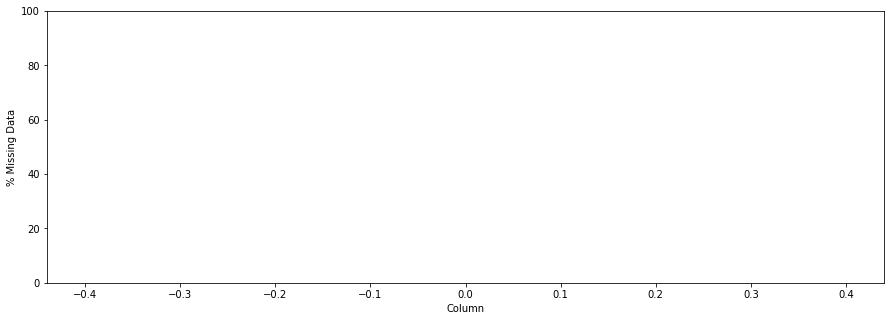

In [ ]:
analyze_missing_data(target.to_frame(), plot_rows=False)

#Marital Status

total columns: 14
total columns w/ missing data:  12
% columns w/ missing data:  85.71428571428571
total rows: 31997
total rows w/ missing data:  31997
% rows w/ missing data:  100.0


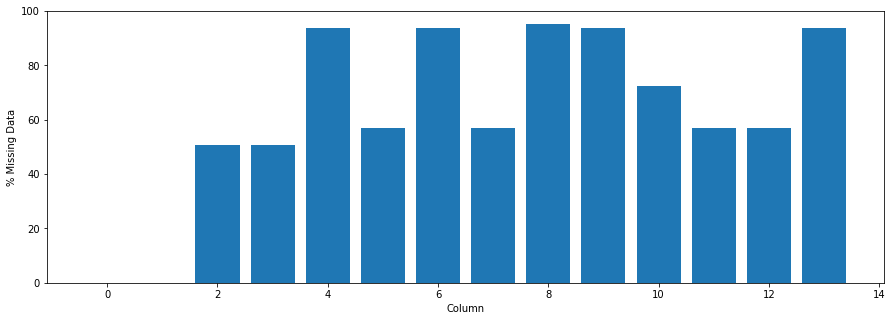

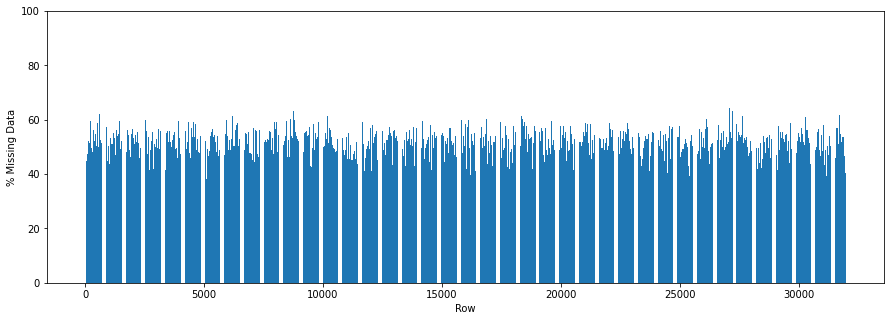

In [ ]:
analyze_missing_data(marital_status, plot_rows=True)

In [ ]:
#grouping rows by marital status
married = pd.DataFrame()
live_together = pd.DataFrame()
no_cohab = pd.DataFrame()
refused = pd.DataFrame()
not_ascertained = pd.DataFrame()
dont_know = pd.DataFrame()
missing = 0

married = interviewData[interviewData['MARITAL_A']==1]
live_together = interviewData[interviewData['MARITAL_A']==2]
no_cohab = interviewData[interviewData['MARITAL_A']==3]
refused = interviewData[interviewData['MARITAL_A']==7]
not_ascertained = interviewData[interviewData['MARITAL_A']==8]
dont_know = interviewData[interviewData['MARITAL_A']==9]

married['MARITAL_A']


0        1
1        1
2        1
3        1
4        1
        ..
31991    1
31992    1
31993    1
31995    1
31996    1
Name: MARITAL_A, Length: 14759, dtype: int64

#Insurance
Since I don't think that insurance type is relevant to our question, we can use NOTCOV_A to determine whether someone has health insurance coverage or not.

total columns: 34
total columns w/ missing data:  25
% columns w/ missing data:  73.52941176470588
total rows: 31997
total rows w/ missing data:  31997
% rows w/ missing data:  100.0


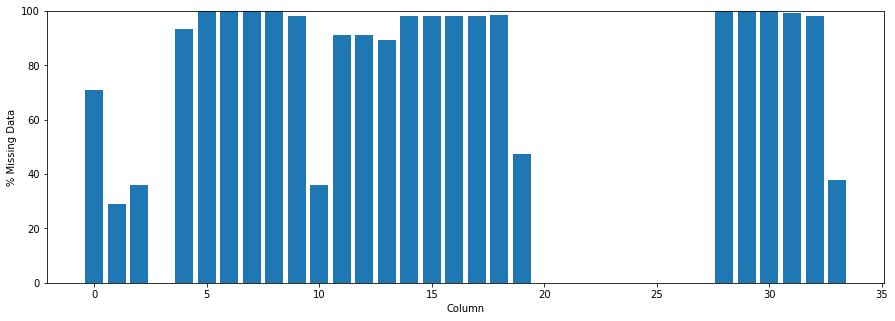

In [ ]:
analyze_missing_data(insurance, plot_rows=False)

#Cancer

For this section, rather than compiling all of the answers manually, I think we should use the CANEV_A column, which asks if the responder has ever been told that they have cancer. According to the codebook, only 14% of respondents refused to answer or didn't know, and that data is also encoded numerically.

total columns: 1
total columns w/ missing data:  0
% columns w/ missing data:  0.0
total rows: 31997
total rows w/ missing data:  0
% rows w/ missing data:  0.0


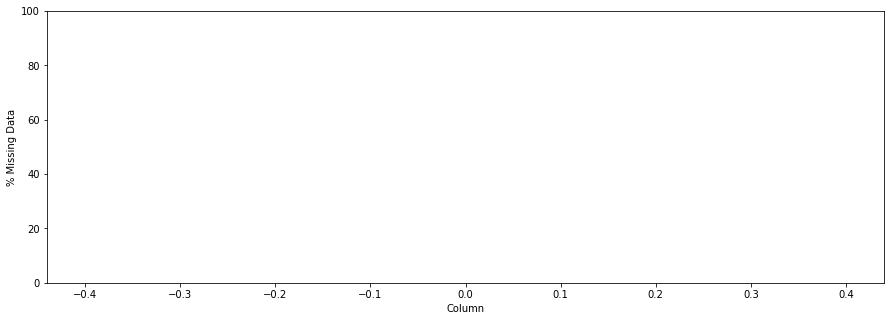

In [ ]:
hist_cancer = interviewData.loc[:,'CANEV_A']
analyze_missing_data(hist_cancer.to_frame(), plot_rows = False)

total columns: 61
total columns w/ missing data:  60
% columns w/ missing data:  98.36065573770492
total rows: 31997
total rows w/ missing data:  31997
% rows w/ missing data:  100.0


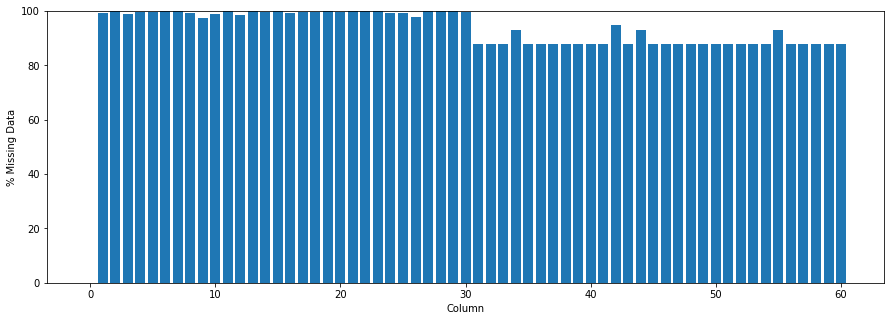

In [ ]:
analyze_missing_data(cancer, plot_rows=False)

From the sections I looked at, it looks like the Cancer, Marital Status, and Health Insurance sections have the largest proportion of missing data. We probably don't want to include any of that as a feature.

# Chongqing
Columns 163-268

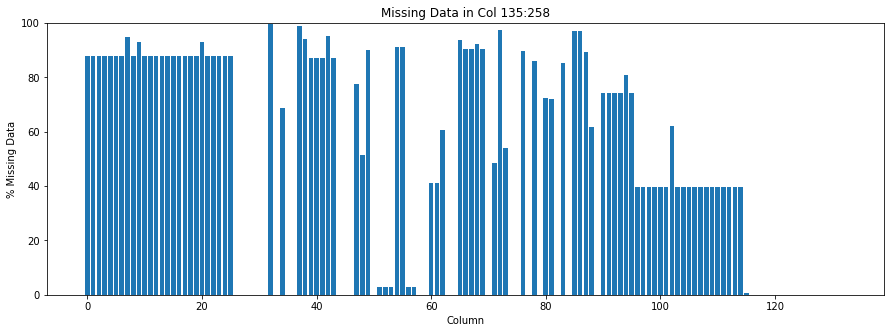

In [ ]:
#graph nans per column, normalized
tot = len(interviewData.index)
missingDataCounts_cols = interviewData.isnull().sum()/tot*100

fig = plt.figure(figsize=(15, 5))
plt.bar(np.arange(268-135), missingDataCounts_cols[135:268])

plt.ylim(top=100)
plt.xlabel('Column')
plt.ylabel('% Missing Data')
plt.title('Missing Data in Col 135:258')
plt.show()

In [ ]:
# find data that is missing data rate is smaller than 30%
index_list = []
data_list = []
for index,number in enumerate(missingDataCounts_cols[135:268]):
    if number < 30:
        index_list.append([index])
        data_list.append([number])

import numpy as np
index_list = np.array(index_list)
data_list = np.array(data_list)
index_list += 135
total = np.concatenate((index_list, data_list),axis=1)
total

array([[161.        ,   0.        ],
       [162.        ,   0.        ],
       [163.        ,   0.        ],
       [164.        ,   0.        ],
       [165.        ,   0.        ],
       [166.        ,   0.        ],
       [168.        ,   0.        ],
       [170.        ,   0.        ],
       [171.        ,   0.        ],
       [179.        ,   0.        ],
       [180.        ,   0.        ],
       [181.        ,   0.        ],
       [185.        ,   0.        ],
       [186.        ,   2.87526956],
       [187.        ,   2.87526956],
       [188.        ,   2.87526956],
       [191.        ,   2.87526956],
       [192.        ,   2.87526956],
       [193.        ,   0.        ],
       [194.        ,   0.        ],
       [198.        ,   0.        ],
       [199.        ,   0.        ],
       [205.        ,   0.        ],
       [209.        ,   0.        ],
       [210.        ,   0.        ],
       [212.        ,   0.        ],
       [214.        ,   0.        ],
 

In [ ]:
# Since most of the data are not missing so much data
# Next we first consider if the data are relevant to our proposal
for item in total:    
    print(interviewData.iloc[:,int(item[0])].describe())

count    31997.000000
mean         2.807794
std          0.601960
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: HISDETP_A, dtype: float64
count    31997.000000
mean         1.870238
std          0.336047
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: HISP_A, dtype: float64
count    31997.000000
mean         2.683814
std          1.020973
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: REGION, dtype: float64
count    31997.0
mean      2019.0
std          0.0
min       2019.0
25%       2019.0
50%       2019.0
75%       2019.0
max       2019.0
Name: SRVY_YR, dtype: float64
count    31997.000000
mean         1.540019
std          0.501218
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          7.000000
Name: SEX_A, dtype: float64
count    319

In [ ]:
list_review = [
    ['Hispannic origin detail',False,''],
    ['Hispanic ethnicity of SA',False,''],
    ['House hold region', True,''],
    ['Survey Year', False,'Mostly are 2019 not helpful'],
    ['Sex',True,'Need to filter out the code 7 to average sex'],
    ['Age',True,''],
    ['ASAT',False,''],
    ['House hold', True,''],
    ['How long live in the house',True,''],
    ['Hard to reach food by balance', True,''],
    ['Hard to reach food by any food', False,'large of the people never face this problem'],
    ['Worry food will run out', True,''],
    ['Recieve food stamps', False,''],
    ['Income by other sources', True,'Thought most of them do dont have any income from other sources it could still be hlpful'],
    ['Income by retirement', True,''],
    ['Income from public assistance',False,'only 2.87% have yes'],
    ['Sample adults 18+ and the sample adult did not refuse both the income from wages and income from accounts questions',False,''],
    ['Income from Social Security or Railroad Retirement',True,''],
    ['Income from accounts',True,'need cleaning code 9 8 7'],
    ['Income from wages', True,''],
    ['Currently in school',True,'Asking 18+ adults this quesiton'],
    ['Born in US', True,''],
    ['Ever serve active duty military',True,''],
    ["Sample adult's current marital status",True,'Useful information for juedging'],
    ['Sexual Orientation',True,'Since 93% are strainght dont think helpful'],
    ['Ever used smokeless tobacco',False,''],
    ['Ever smoked a pipe filled with tobacco',False,''],
    ['Ever smoked a cigar',True,''],
    ['Ever smoked electronic cigar',False,''],
    ['Ever smoked 100 cigarettes',False,'Already havcing smoked or not, the data did not show difference between haven smoke or not'],
    ['How often feel afraid',True,''],
    ['How often had pain',True,'Important measure'],
    ['How often became easily annoyed, past 2 weeks', True,''],
    ['How often cant sit still, past 2 weeks',False,'maybe having pain is enough'],
    ['How often had trouble relaxing, past 2 weeks',True,''],
    ['How often worrying too much, past 2 weeks',True,''],
    ['How often cannot stop worrying',True,''],
    ['How often felt nervous/anxious/on edge, past 2 weeks',True,'Still a big strcutucre on discussing worried'],
    ['How often moving or speaking slow or fast, past 2 weeks',False,'near 91% are normal'],
    ['How often trouble concentrating, past 2 weeks',False,''],
    ['How often feeling bad about self, past 2 weeks',True,''],
    ['How often undereating or overeating, past 2 weeks',True,''],
    ['How often feeling tired, past 2 weeks',True,''],
    ['How often trouble with sleeping, past 2 weeks',True,''],
    ['How often feeling down, past 2 weeks',True,''],
    ['Severity of depressive symptoms - PHQ scale categorization',True,'Important Measure'],
    ['Needed counseling/therapy but did not get it due to cost, past 12m',False,'Same question about money but still need more evidence to point out that it really matters'],
    ['Delayed counseling/therapy due to cost, past 12m',False,'Same reason, delaying therapy may help and may not help but for more clearer judgement remove it.']  
]

In [ ]:
len(list_review)

48

In [ ]:
# Take out the values that we want
series = []
for index, item in enumerate(total):
    if list_review[index][1] == True:
        series.append(interviewData.iloc[:,int(item[0])])

series

[0        3
 1        3
 2        3
 3        3
 4        3
         ..
 31992    4
 31993    4
 31994    4
 31995    4
 31996    4
 Name: REGION, Length: 31997, dtype: int64, 0        1
 1        2
 2        1
 3        1
 4        1
         ..
 31992    2
 31993    1
 31994    1
 31995    2
 31996    2
 Name: SEX_A, Length: 31997, dtype: int64, 0        97
 1        28
 2        72
 3        60
 4        60
          ..
 31992    68
 31993    47
 31994    68
 31995    31
 31996    54
 Name: AGEP_A, Length: 31997, dtype: int64, 0        1
 1        2
 2        7
 3        1
 4        1
         ..
 31992    1
 31993    1
 31994    2
 31995    1
 31996    1
 Name: HOUTENURE_A, Length: 31997, dtype: int64, 0        2
 1        1
 2        7
 3        4
 4        5
         ..
 31992    5
 31993    4
 31994    4
 31995    3
 31996    4
 Name: HOUYRSLIV_A, Length: 31997, dtype: int64, 0        3
 1        3
 2        7
 3        3
 4        3
         ..
 31992    3
 31993    3
 31994   

In [ ]:
#This will generate a new cvs file containing useful data that we want
caller = series[0]
for other in series[1:]:
    caller = pd.concat([caller, other],axis=1)
caller.to_csv('result.csv')

# Brief Introduction Of What I've Done 1


The data cleaning process here is divided in several steps
1. First I look throught the data in column 135:268 to see if there are missing values
> And the result I see shows that most of the data as shown in 'Missing Data in Col 135:258' are having a huge data missing. Some of them are missing more than 80%. 
2. So I filter out the data column that have data missing larger than 30%
> And I get 48 datas
3. Next I search through these 48 data in the NHIS frequency Codebook and see if some of it are unuseful
> To my intuition, some of the survey inside may not be helpful for identifying if the person could potentially be depreesed, so I simply remove them
4. The dicription of the column is written in a list called review_list where True means we want False means we dont want, some have reasons about why I didn't chose it.
> I was a bit concerned here, some of the questions are all pointing the same problem, such as quesitons about one's economic status, I dont know having more questions result on litterly the same thing will cause what kind of impact to the model. But the standard here is I try to avoid data columns that have the same question. Which means if we have two questions look like a. Do you have enough money to buy food b. Do you have a enough money to buy a balance food, I will only left a. into the final data.
5. The final filtered data that I created is stored in result.csv
---
It could be interesting to cluster some of the survey result to see if one's answer on wheter he/she was suffering depression, pain, trouble relaxing having a impact on diagnosing this person.

In [ ]:
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


def get_data(path):
    """
    This function read in the data and generate pandas columns
    """
    # Notice now it only returns a preprocessed pandas dataframe
    return caller

data = get_data('')
data.fillna(method='ffill', inplace=True)
use_cols = ['SEX_A', 'AGEP_A', 'HOUTENURE_A', 'HOUYRSLIV_A',
       'FDSBALANCE_A', 'FDSRUNOUT_A', 'INCOTHR_A', 'INCRETIRE_A', 'INCSSRR_A',
       'INCINTER_A', 'INCWRKO_A', 'SCHCURENR_A', 'NATUSBORN_A', 'AFVET_A',
       'MARITAL_A', 'ORIENT_A', 'CIGAREV_A', 'PAIFRQ3M_A', 'GAD77_A',
       'GAD76_A', 'GAD74_A', 'GAD73_A', 'GAD72_A', 'GAD71_A', 'PHQ86_A',
       'PHQ85_A', 'PHQ84_A', 'PHQ83_A','PHQ82_A', 'PHQ81_A']  # 'REGION' was removed 

#######################################################################

# Here set the columns for predicting
pred_col = ['PHQCAT_A']

#######################################################################

In [ ]:
# Check if there is any null inside data
print(data.isnull().any(axis=0))

REGION          False
SEX_A           False
AGEP_A          False
HOUTENURE_A     False
HOUYRSLIV_A     False
FDSBALANCE_A    False
FDSRUNOUT_A     False
INCOTHR_A       False
INCRETIRE_A     False
INCSSRR_A       False
INCINTER_A      False
INCWRKO_A       False
SCHCURENR_A     False
NATUSBORN_A     False
AFVET_A         False
MARITAL_A       False
ORIENT_A        False
CIGAREV_A       False
PAIFRQ3M_A      False
GAD77_A         False
GAD76_A         False
GAD74_A         False
GAD73_A         False
GAD72_A         False
GAD71_A         False
PHQ86_A         False
PHQ85_A         False
PHQ84_A         False
PHQ83_A         False
PHQ82_A         False
PHQ81_A         False
dtype: bool


In [ ]:
# Here the predict data is also cleaned
interviewData['PHQCAT_A'].isnull().any()

False

In [ ]:
# Here should deal with the numbers, as changing some unrespond to other number
# The aim of this section is to simplify the data, making it easier to understand

# For SEX_A change code 7 to 1 (refuse to Male), It doesn't matter since only 3 refuse
# For AGEP_A change code 97 98 99 into the median of the series
# For HOUTENURE_A code 7,8,9 to 2 As assunme most of the people even refuse to answer the quesiotn as rented
# For HOUYRSLIV_A code 7,8,9 to code 1, assume most are less that 1 year
# For FDSBALANCE_A code 7,8,9 to code 3, assume most are having enough money
# For FDSRUNOUT_A same as above
# For INCOTHR_A code 7,8,9 to code 2, assume most have income from wages
# For INCRETIRE_A same as above
# For INCSSRR_A same
# For INCINTER_A same
# For INCWRKO_A same
# For SCHCURENR_A code 7,8,9 to code 2, assume most are not in school
# For NATUSBORN_A code 7,8,9 to code 2, assume whose who not answer are not in born in US
# For AFVET_A same, most are not in military
# For MARITAL_A code 7,8,9 to code 3, assume most have neither marriage or sth like it
# For ORIENT_A code 5,7,8,9 to code 2, assume most are straight
# For CIGAREV_A code 7,8,9 to code 1, assume most have cigar
# For PAIFRQ3M_A code 7,8,9 to code 2, assum having some days pain
# For GAD77_A same
# For GAD76_A same
# For GAD74_A same
# For GAD73_A same
# For GAD72_A same
# For GAD71_A same
# FOr PHQ86_A same
# For PHQ85_A same
# For PHQ84_A same
# For PHQ83_A same
# For PHQ82_A same
# For PHQ81_A same

# data['SEX_A'].replace(7,1,inplace=True)
# data['AGEP_A'].replace([97,98,99], data['AGEP_A'].median,inplace=True)
# data['HOUTENURE_A'].replace([7,8,9],2,inplace=True)
# data['HOUYRSLIV_A'].replace([7,8,9],1,inplace=True)
# data['FDSBALANCE_A'].replace([7,8,9],3,inplace=True)
# data['FDSRUNOUT_A'].replace([7,8,9],3,inplace=True)
# for name in ['INCOTHR_A','INCRETIRE_A','INCSSRR_A','INCINTER_A','INCWRKO_A']:
#     data[name].replace([7,8,9],2,inplace=True)
# for name in ['SCHCURENR_A','NATUSBORN_A','AFVET_A','ORIENT_A','PAIFRQ3M_A','GAD77_A','GAD76_A','GAD74_A',
#              'GAD73_A','GAD72_A','GAD71_A','PHQ86_A','PHQ85_A','PHQ84_A','PHQ83_A','PHQ82_A','PHQ81_A']:
#     data[name].replace([7,8,9],2,inplace=True)
# data['MARITAL_A'].replace([7,8,9],3,inplace=True)
# data['CIGAREV_A'].replace([7,8,9],1,inplace=True)
# # In order to check if there are values that still in code 7,8,9
# data.max()

In [ ]:
features = data[use_cols].values

################################

# Applying Binary Encoding
labels = interviewData[pred_col].replace(1,0)
labels = labels.replace([2,3,4,8],1).values

################################

PREPROCESSING = True

if PREPROCESSING:
    scalar = StandardScaler()
    features = scalar.fit_transform(features)

# Simply split the data into 3:7, where 3 is test data, 7 is train data
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True)

In [ ]:
model = SVC()
model.fit(x_train, np.ravel(y_train))
y_predict = model.predict(x_test)

string = f'The result of {model}:\n'
string += f'{classification_report(y_test, np.ravel(y_predict))}\n'
# string += f'The coefficient of the model is \n{model.coef_}\n'
print(string)
plt.show()

The result of SVC():
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5083
           1       0.96      0.93      0.94      1317

    accuracy                           0.98      6400
   macro avg       0.97      0.96      0.97      6400
weighted avg       0.98      0.98      0.98      6400




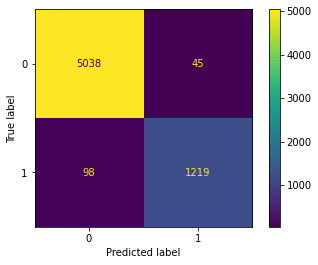

In [ ]:
cm = confusion_matrix(y_test, y_predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

What I've Done 2

1. First deal with the data cleaning///
I relook at the data and clean the code 7,8,9 to code in 1~4, but notice that there might have stack overflow if the allocated memory is too small

2. Second write an SVM model (continuing...
)

In [ ]:
# Keep going with the SVM model
# Standardization and Train test split is already done in part 2

# 1. Creating Train and Test csv files
column_name = data.columns
train_data = np.hstack((x_train, y_train.reshape(-1,1)))
test_data = np.hstack((x_test, y_test.reshape(-1,1)))


################################

train_csv = pd.DataFrame(train_data, columns = use_cols + pred_col)
test_csv = pd.DataFrame(test_data, columns = use_cols + pred_col)
train_csv.to_csv('train.csv')
test_csv.to_csv('test.csv')

################################

Using 1 as Regularization for SVC(C=1)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5083
           1       0.96      0.93      0.94      1317

    accuracy                           0.98      6400
   macro avg       0.97      0.96      0.97      6400
weighted avg       0.98      0.98      0.98      6400



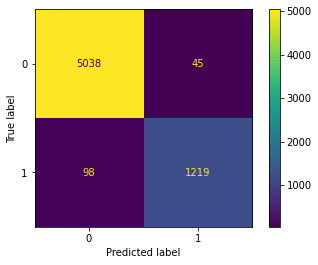

Using 10 as Regularization for SVC(C=10)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5083
           1       0.97      0.92      0.94      1317

    accuracy                           0.98      6400
   macro avg       0.97      0.96      0.97      6400
weighted avg       0.98      0.98      0.98      6400



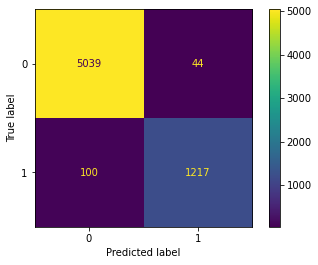

Using 100 as Regularization for SVC(C=100)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5083
           1       0.94      0.92      0.93      1317

    accuracy                           0.97      6400
   macro avg       0.96      0.95      0.96      6400
weighted avg       0.97      0.97      0.97      6400



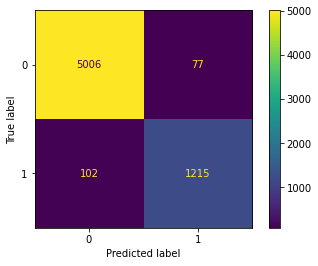

In [ ]:
# 2. Cross Validation and Adding Regularization
regular_values = [1, 10, 100]

for num in regular_values:
    model = SVC(C=num)
    model.fit(x_train, np.ravel(y_train))
    y_predict = model.predict(x_test)
    
    
    cm = confusion_matrix(y_test, y_predict, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    
    print(f'Using {num} as Regularization for {model}\n')
    print(classification_report(np.ravel(y_test), y_predict))
    plt.show()

# Part 3 
+ First add output to train.csv and test.csv
+ Second add regularization and Confusion Matrix for viewing
+ Third add 10-fold cross validation to see the score
+ Fourth add 20% train test split and standardize the data

# Lichao
Columns 269-402

In [ ]:
from prettytable import PrettyTable

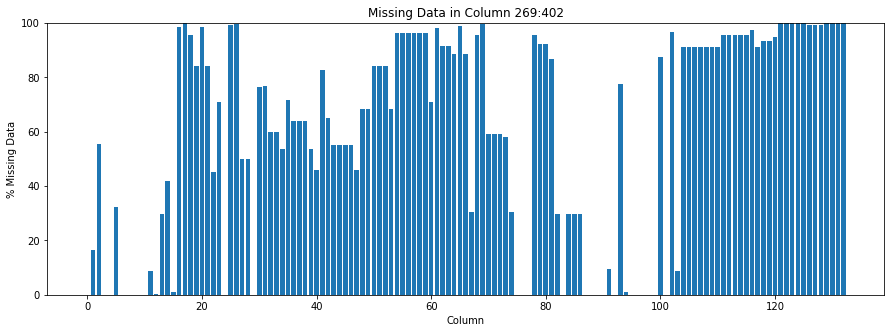

In [ ]:
#graph nans per column, normalized
tot = len(interviewData.index)
missingDataCounts_cols = (interviewData.isnull().sum()/tot)*100
fig = plt.figure(figsize=(15, 5))
plt.bar(np.arange(402-269), missingDataCounts_cols[269:402])
plt.ylim(top=100)
plt.xlabel('Column')
plt.ylabel('% Missing Data')
plt.title('Missing Data in Column 269:402')
plt.show()

In [ ]:
# find data that is missing data rate is smaller than 30%
index_list_1 = []
data_list_1 = []
for index,number in enumerate(missingDataCounts_cols[269:402]):
    if number < 30:
        index_list_1.append([index])
        data_list_1.append([number])

import numpy as np
#print(data_list_1)
index_list_1 = np.array(index_list_1)
data_list_1 = np.array(data_list_1)



tb = PrettyTable()
tb.field_names = ["column number", "columns name","Data"]
for i in range(len(index_list_1)):
  #print(i)
  #print(index_list_1[i]+269,data_list_1[i])
  #print(interviewData.columns[269])
  tb.add_row([index_list_1[i]+269,interviewData.columns[int(index_list_1[i])+269] ,float(data_list_1[i])])
print(tb)
print("We have ",len(index_list_1),"column can use in 269:402")

+---------------+--------------+---------------------+
| column number | columns name |         Data        |
+---------------+--------------+---------------------+
|     [269]     |  MHTHRPY_A   |         0.0         |
|     [270]     |    MHRX_A    |   16.3265306122449  |
|     [272]     |   DEPMED_A   |         0.0         |
|     [273]     |  DEPFREQ_A   |         0.0         |
|     [275]     |   ANXMED_A   |         0.0         |
|     [276]     |  ANXFREQ_A   |         0.0         |
|     [277]     | HOMEHC12M_A  |         0.0         |
|     [278]     |  THERA12M_A  |         0.0         |
|     [279]     |  EYEEX12M_A  |         0.0         |
|     [280]     | WRKHLTHFC_A  |  8.691439822483357  |
|     [281]     | WORKHEALTH_A | 0.23127168172016127 |
|     [282]     |   SHTHPV_A   |  29.630902897146605 |
|     [284]     | SHTTETANUS_A |  0.8750820389411508 |
|     [293]     |  SHTPNUEV_A  |         0.0         |
|     [298]     | SHTFLU12M_A  |         0.0         |
|     [344

# Gabby 
Columns: 403 - end

Here's ALL the columns with 0 missing values. We can use this as the dataset for initial results.

In [ ]:
interview_noNANs = interviewData.dropna(axis=1)
noNanColsPer = len(interview_noNANs.columns)/len(interviewData.columns)
print('We have ', len(interview_noNANs.columns), ' columns left, i.e. ', len(interview_noNANs.columns)/len(interviewData.columns)*100, '%')

We have  168  columns left, i.e.  31.46067415730337 %


In [ ]:
#grab my data
col_D = interviewData.iloc[:, 402:]

In [ ]:
#look at my column_names

col_D_names = col_D.columns
for name in col_D_names:
    print(name)

In [ ]:
#look at columns to check if they are all the same type
#these are probably not very useful 
col_D.nunique().index[col_D.nunique()==1]

#HHSTAT_A = Indicates person is the Sample Adult 
#RECTYPE = Record type

Index(['HHSTAT_A', 'RECTYPE'], dtype='object')

In [ ]:
#count NANs
col_D_NANs = col_D.isnull().sum(axis=0)
col_D_NANs

PRVSCOV2_A    31443
PRVSCOV1_A    11515
PRDNCOV2_A    31443
PRDNCOV1_A    11515
PRRXCOV2_A    31443
              ...  
RECTYPE           0
WTFA_A            0
WTIA_A            0
HHX               0
POVRATTC_A        0
Length: 132, dtype: int64

In [ ]:
#get any columns w/o NANs
colD_noNANS = col_D.dropna(axis=1)
len(colD_noNANS.columns)

52

#Combining Rows
I'm combining related row. For example there are many in my section that deal with either plan 1 or plan 2. I'm basically treating plan 1 and plan 2 as equivalent. For any rows with a NAN in one column and an aswer in another column, I made a "summary" column with the answer provide. 
For columns that DO have answers in both columns, I have a "hierarchy" if there is a 1 (YES) for either column, the summary column gets a 1. 

In [ ]:
#functions for combining columns
def combine_two_columns (df, colA, colB, df_summ, summColName):
    '''For related columns, when only one column has a NAN, 
    the summary column gets the answer of the other column.
    df: dataframe with original data
    colA: name of the first original column to combine
    colB: name of the second original column to combine
    df_summ: dataframe in which to put summary column
    sumColName: name of summary column'''
    df_summ[summColName] = df[[colA, colB]].min(axis=1, skipna=True)
    return ()

In [ ]:
#make dataframe containing all full columns
#will add summary columns here
dataSummary = colD_noNANS.copy()

In [ ]:
# #for columns 510-520, plan payment
# #10 = paid by self/fam
# #11 = employer/union
# #12 = someone outside family 
# #12 = gov program
# #13 = someone outside family 
# #13= self and employer/union
# #14 = self and gov program
# #15 = employer and gov program
# #16 = all 

# #if row has only self/fam payments
# dataSummary['PLNPAY_SUMM'] = np.where(((col_D['PLN1PAY1_A'] == 1) | (col_D['PLN2PAY1_A'] == 1)) &
#                                       ((col_D['PLN1PAY2_A'] != 1) & (col_D['PLN2PAY2_A'] != 1) & 
#                                        (col_D['PLN1PAY3_A'] != 1) & (col_D['PLN2PAY3_A'] != 1) &
#                                        (col_D['PLN1PAY4_A'] != 1) & (col_D['PLN2PAY4_A'] != 1) & 
#                                        (col_D['PLN1PAY5_A'] != 1) & (col_D['PLN2PAY5_A'] != 1) & 
#                                        (col_D['PLN1PAY6_A'] != 1) & (col_D['PLN2PAY6_A'] != 1)), 10, 0)
# #if row has only employer/union payments
# dataSummary['PLNPAY_SUMM'] = np.where(((col_D['PLN1PAY2_A'] == 1) | (col_D['PLN2PAY2_A'] == 1)) &
#                                       ((col_D['PLN1PAY1_A'] != 1) & (col_D['PLN1PAY1_A'] != 1) & 
#                                        (col_D['PLN1PAY3_A'] != 1) & (col_D['PLN2PAY3_A'] != 1) &
#                                        (col_D['PLN1PAY4_A'] != 1) & (col_D['PLN2PAY4_A'] != 1) & 
#                                        (col_D['PLN1PAY5_A'] != 1) & (col_D['PLN2PAY5_A'] != 1) & 
#                                        (col_D['PLN1PAY6_A'] != 1) & (col_D['PLN2PAY6_A'] != 1)), 10, dataSummary['PLNPAY_SUMM'])
# #if row has only gov program/payments
# dataSummary['PLNPAY_SUMM'] = np.where(((col_D['PLN1PAY2_A'] == 1) | (col_D['PLN2PAY2_A'] == 1)) &
#                                       ((col_D['PLN1PAY1_A'] != 1) & (col_D['PLN1PAY1_A'] != 1) & 
#                                        (col_D['PLN1PAY3_A'] != 1) & (col_D['PLN2PAY3_A'] != 1) &
#                                        (col_D['PLN1PAY4_A'] != 1) & (col_D['PLN2PAY4_A'] != 1) & 
#                                        (col_D['PLN1PAY5_A'] != 1) & (col_D['PLN2PAY5_A'] != 1) & 
#                                        (col_D['PLN1PAY6_A'] != 1) & (col_D['PLN2PAY6_A'] != 1)), 10, dataSummary['PLNPAY_SUMM'])

In [ ]:
#check how many people have 2 plans